In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Project: Exploratory Data Analysis (EDA) and Visulization of Netflix Original Films&IMDB Scores Dataset

- Project: Data Analysis with Python: Zero to Pandas - Course Project 
= Dataset used: [Netflix Original Films & IMDB Scores](https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores) from Kaggle
- Goal: Perform data cleaning, EDA and visualization on the data.

This notebook is also the Course Project of the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com). 

## Downloading the Dataset

I'm running this notebook via Jupyter Notebook locally. Let's download the dataset to my local folder.

Download Kaggle dataset to local using opendatasets library
Inspect the dataset folder using listdir from os library

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
path = "https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores" 

In [4]:
import opendatasets as od
od.download(path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chewziqing
Your Kaggle Key: ········


100%|██████████| 12.4k/12.4k [00:00<00:00, 8.75MB/s]

The dataset has been downloaded and extracted.

In [49]:
data_dir = "./netflix-original-films-imdb-scores"

In [51]:
import os
os.listdir(data_dir)

['NetflixOriginals.csv']

Let us save and upload our work to Jovian before continuing.

In [95]:
project_name = "movies-imdb-scores" 

In [242]:
!pip install jovian --upgrade -q

In [243]:
import jovian

In [244]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chewziqing/movies-imdb-scores" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/chewziqing/movies-imdb-scores


'https://jovian.ai/chewziqing/movies-imdb-scores'

## Data Preparation and Cleaning

In [245]:
csv_path = "./netflix-original-films-imdb-scores/NetflixOriginals.csv"

# insect the character encoding of csv
!pip install chardet
import chardet
with open(csv_path, "rb") as r:
    result = chardet.detect(r.read(100000))
print(result)

# define encoding in pd.read_csv
df = pd.read_csv(csv_path, encoding="Windows-1252")

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [246]:
# UnicodeDecodeError resolved. Display first 5 rows of dataframe
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [247]:
# about the shape and size of dataframe
print(f"Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Columns: {list(df.columns)}")

Shape: (584, 6)
Number of rows: 584
Number of columns: 6
Columns: ['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language']


In [248]:
# split into numerical features and categorical features
df_numerical = df.select_dtypes(include="number")
df_categorical = df.select_dtypes(include="object")

print(f"Numerical Columns: {list(df_numerical.columns)}")
print(f"Categorical Columns: {list(df_categorical.columns)}")

Numerical Columns: ['Runtime', 'IMDB Score']
Categorical Columns: ['Title', 'Genre', 'Premiere', 'Language']


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [250]:
# number of unique values in all columns
for col in df.columns:
    print(f"Column {col} has {df[col].nunique()} unique values.")

Column Title has 584 unique values.
Column Genre has 115 unique values.
Column Premiere has 390 unique values.
Column Runtime has 124 unique values.
Column IMDB Score has 54 unique values.
Column Language has 38 unique values.


In [251]:
# parse column Premiere into datetime with format yyyy/mm/dd
df["Premiere"] = pd.to_datetime(df["Premiere"], infer_datetime_format=True)
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [252]:
# Premiere column has datetime value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [253]:
import jovian

In [254]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chewziqing/movies-imdb-scores" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/chewziqing/movies-imdb-scores


'https://jovian.ai/chewziqing/movies-imdb-scores'

In [255]:
# delimiter is "/"
df["all_languages"] = df["Language"].str.split("/")

# drop Language colum
df.drop("Language", axis=1, inplace=True)

df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,all_languages
0,Enter the Anime,Documentary,2019-08-05,58,2.5,"[English, Japanese]"
1,Dark Forces,Thriller,2020-08-21,81,2.6,[Spanish]
2,The App,Science fiction/Drama,2019-12-26,79,2.6,[Italian]
3,The Open House,Horror thriller,2018-01-19,94,3.2,[English]
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,[Hindi]


## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [256]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Visualizing Overall IMDB Score Using Bar Plot and Line Plot

In [257]:
score_count = df.groupby("IMDB Score")["IMDB Score"].count()

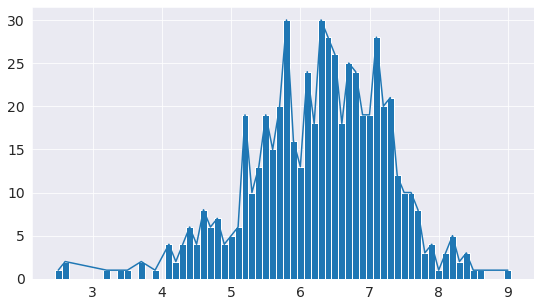

In [258]:
plt.bar(df["IMDB Score"].unique(), score_count, width=0.1)
plt.plot(df["IMDB Score"].unique(), df.groupby("IMDB Score")["IMDB Score"].count());

Observation: Most of the movies were given IMDB Score in range [5, 8]

Score vs Runtime

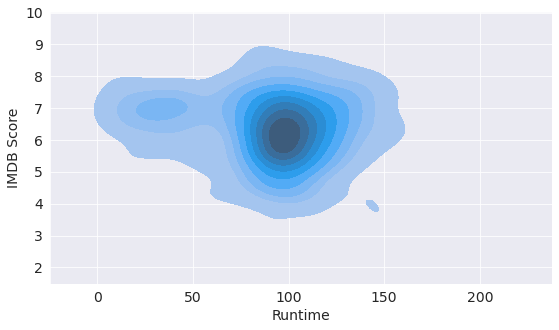

In [259]:
sns.kdeplot(x="Runtime",y="IMDB Score",data=df, shade=True, fill=True);
#sns.scatterplot(df["Runtime"], df["IMDB Score"])

Observation: Most of the movies which had medium IMDB Scores had run time of about 100 minutes. In other words, majority of movies had about 100 minutes of run time.

Score vs Premiere Date Using Scatter Plot

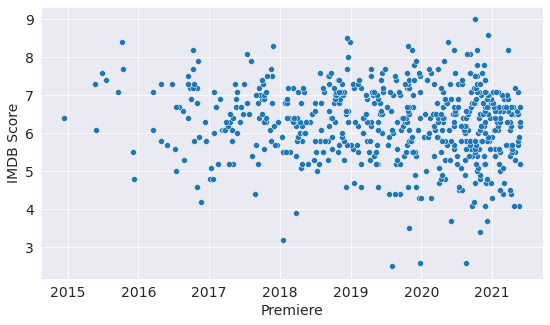

In [260]:
sns.scatterplot(x="Premiere", y="IMDB Score", data=df);

Observation: Premiere date has no directly influence towards IMDB score. The pattern shown in scatter plot above might due to most movies collected were premiered between 2018 and 2021.

Heatmap of Numerical Features

<AxesSubplot:>

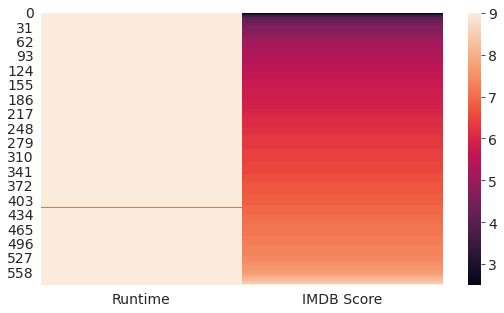

In [261]:
sns.heatmap(df_numerical, vmax=9)

Pairplot of all features

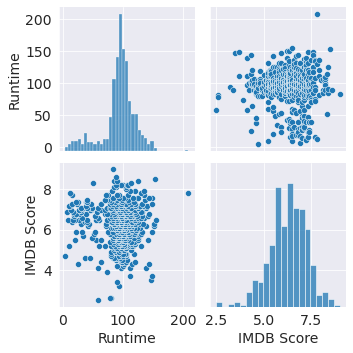

In [262]:
sns.pairplot(df)

Let us save and upload our work to Jovian before continuing

In [263]:
import jovian

In [264]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chewziqing/movies-imdb-scores" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/chewziqing/movies-imdb-scores


'https://jovian.ai/chewziqing/movies-imdb-scores'

In [265]:
import pandas as pd
csv_path = "./netflix-original-films-imdb-scores/NetflixOriginals.csv"

!pip install chardet
import chardet
with open(csv_path, "rb") as r:
    result = chardet.detect(r.read(100000))
print(result)

# define encoding in pd.read_csv
df_new = pd.read_csv(csv_path, encoding="Windows-1252")

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


#### Q1:  Most of the movies are of which language?

In [266]:
new_df = df.copy()


def get_all_unique(df, col):
    result = {}
    for idx in range(len(df[col])):
        value = df[col][idx]
        for item in value:
            if not (item in result):
                result[item] = 1
            else:
                result[item] += 1
    return result

languages = get_all_unique(new_df, "all_languages")
languages = pd.Series(languages, index=languages.keys())
languages.sort_values(ascending=False, inplace=True)

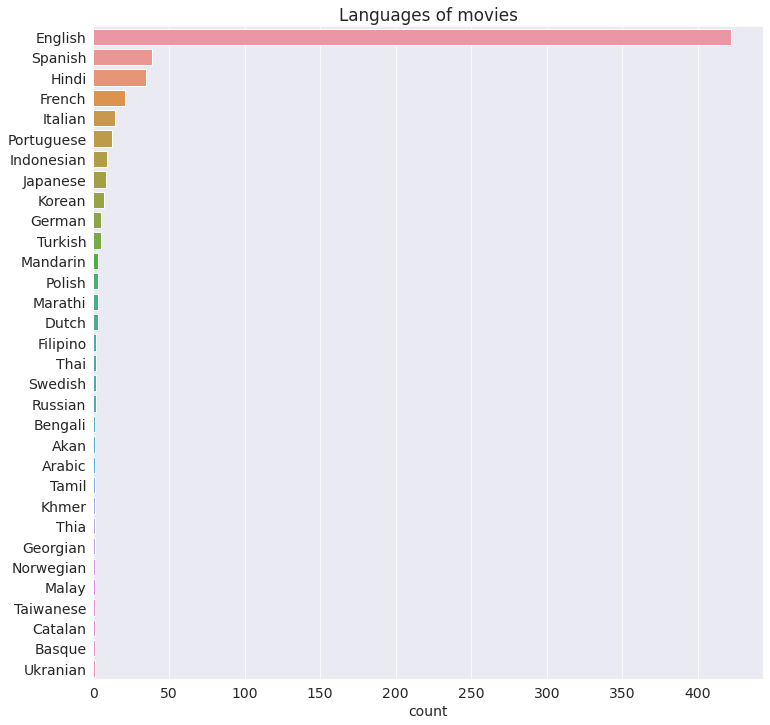

In [267]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages, y=languages.index)
plt.title("Languages of movies")
plt.xlabel("count");

Observation: Number of movies that used English are far more higher than any other languages.

#### Q2:  Movies of which language had the highest average IMDB Scores

In [272]:
df2 = pd.read_csv(csv_path, encoding="Windows-1252")


def get_avg_imdb(df2_series, all_unique_value):
    count = {}
    imdb = {}
    avg = {}
    for v in all_unique_value:
        for idx in range(len(df2_series)):   
            if v in df2_series[idx]:
                if not (v in count.keys()):
                    count[v] = 1
                    imdb[v] = df.loc[idx, "IMDB Score"]
                else:
                    count[v] += 1
                    imdb[v] += df.loc[idx, "IMDB Score"]
    
    for c in count.keys():
        avg[c] = imdb[c] / count[c]
        
    return avg

lang_avg = get_avg_imdb(df2.Language, languages.keys())
lang_avg = pd.Series(lang_avg, index=lang_avg.keys())
lang_avg.sort_values(ascending=False, inplace=True)

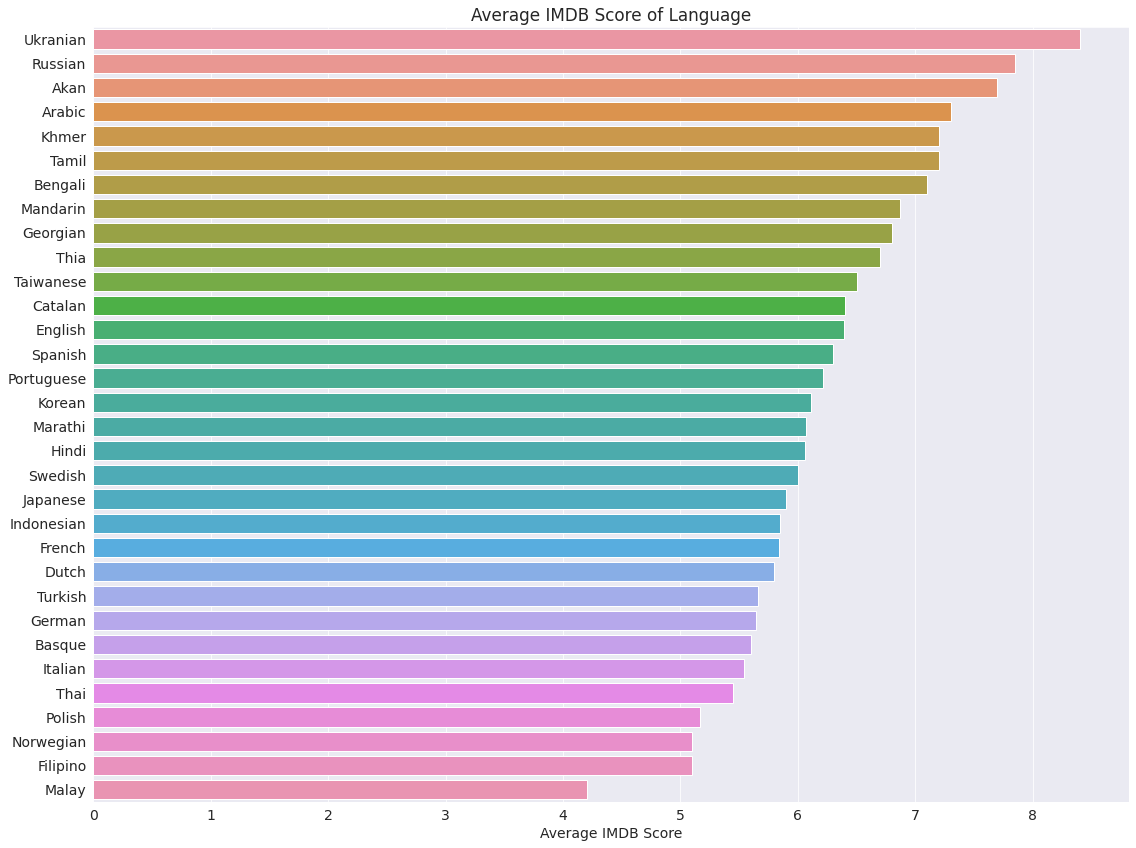

In [273]:
plt.figure(figsize=(16, 12))
sns.barplot(x=lang_avg, y=lang_avg.index)
plt.title("Average IMDB Score of Language")
plt.xlabel("Average IMDB Score")
plt.tight_layout();

Observation:  Ukranian movie had the highest average IMDB Score.

#### Q3: Most of the movies are of which genre?

In [274]:
# delimiter is "/"
new_df["all_genres"] = new_df["Genre"].str.split("/")

# drop Language colum
new_df.drop("Genre", axis=1, inplace=True)

genres = get_all_unique(new_df, "all_genres")
genres = pd.Series(genres, index=genres.keys())
genres.sort_values(ascending=False, inplace=True)

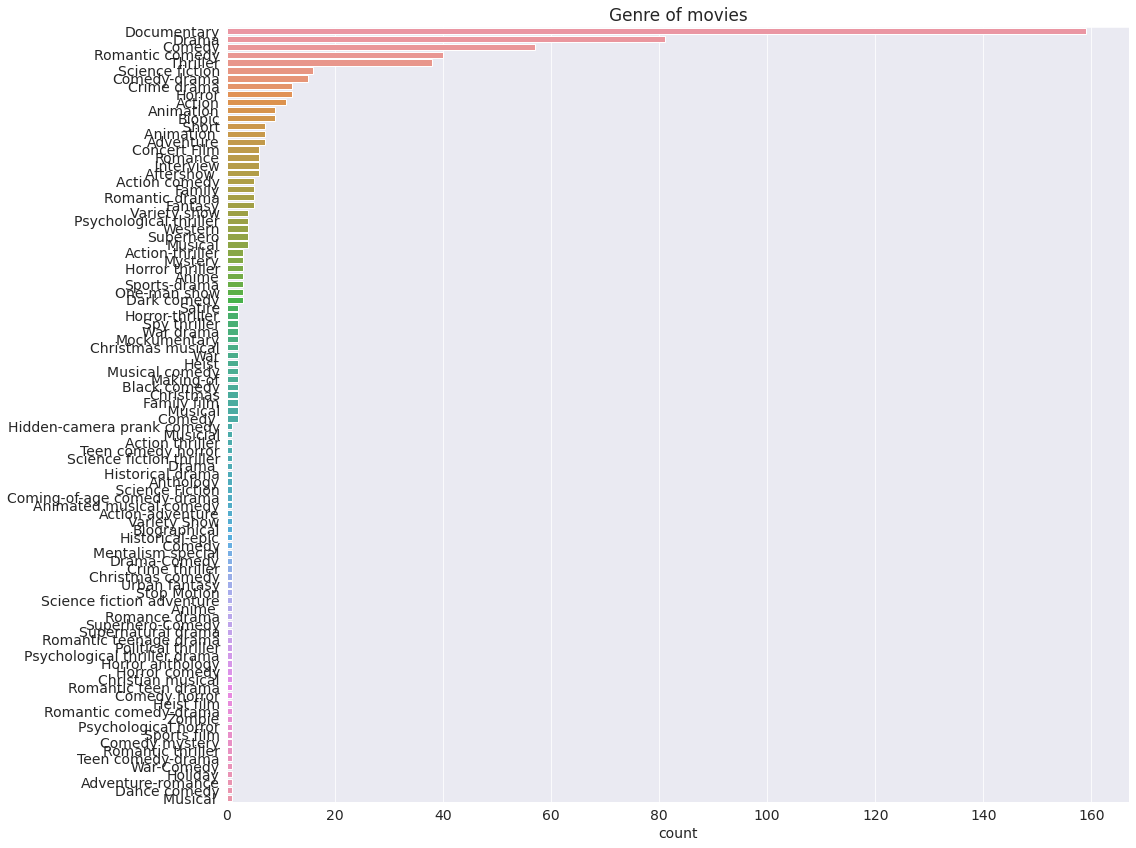

In [275]:
plt.figure(figsize=(16, 12))
sns.barplot(x=genres, y=genres.index)
plt.title("Genre of movies")
plt.xlabel("count")
plt.tight_layout();

Observation: Number of documentary are far more higher other genres, followed by drama with half of its count

#### Q4:  Movies of which genre had the highest average IMDB Scores?

In [276]:
genre_avg = get_avg_imdb(df2.Genre, genres.keys())
genre_avg = pd.Series(genre_avg, index=genre_avg.keys())
genre_avg.sort_values(ascending=False, inplace=True)

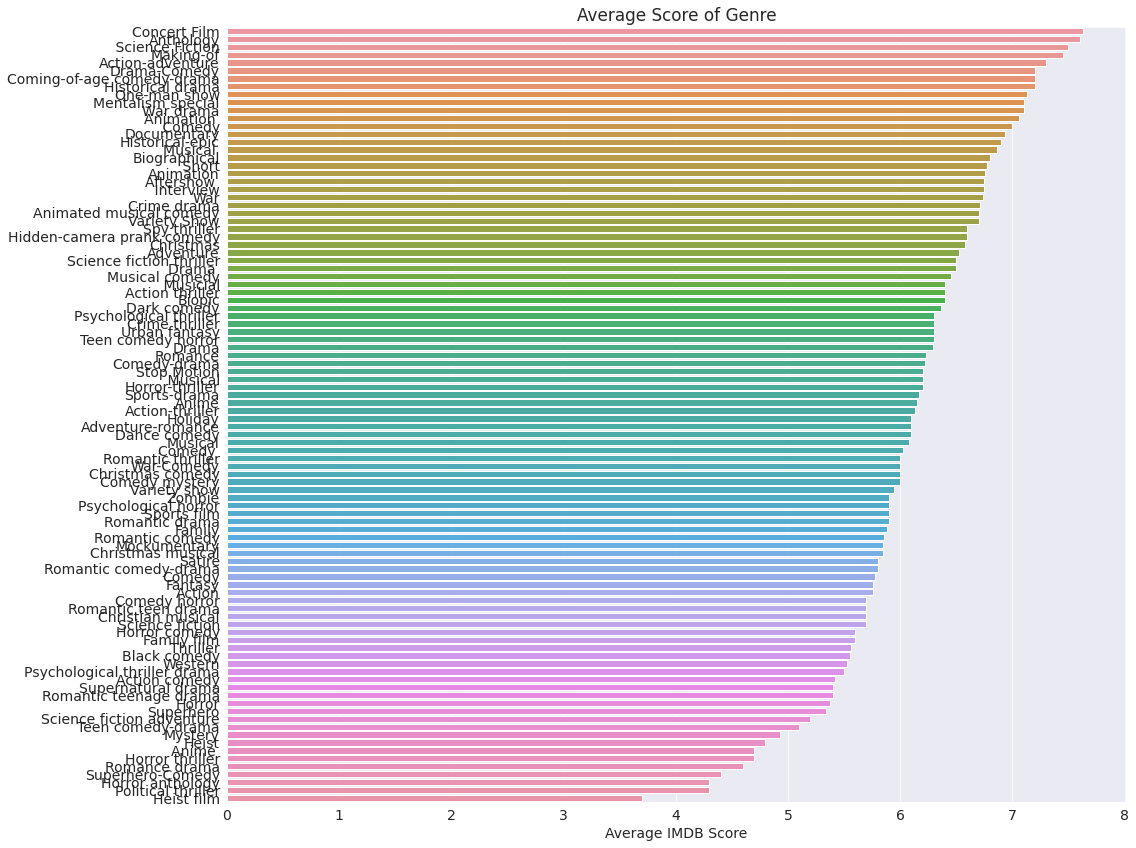

In [277]:
plt.figure(figsize=(16, 12))
sns.barplot(x=genre_avg, y=genre_avg.index)
plt.title("Average Score of Genre")
plt.xlabel("Average IMDB Score")
plt.tight_layout();

Observation:  Concept Film movie had the highest average IMDB Score.

In [278]:
import jovian

In [279]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chewziqing/movies-imdb-scores" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/chewziqing/movies-imdb-scores


'https://jovian.ai/chewziqing/movies-imdb-scores'

## Inferences and Conclusion


- The IMDB Scores for movies in the dataset follow normal distribution.
- Majority of movies have runtime of about 75-125 minutes. In addition, they also have the median IMDB Score, whihc is 6.271747.
- Premiere date has no direct effect on the IMDB SCORE. We cannot make assumption about how premire date influences score, since all movies collected in the dataset are premiered between 2014-2021 only.

Conclusion: To produce more useful insights about factors affecting IMDB Score, we should include more features such as audiences' ratings, awards received etc that have direct relationship with the quality of the movies.

In [280]:
import jovian

In [281]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chewziqing/movies-imdb-scores" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/chewziqing/movies-imdb-scores


'https://jovian.ai/chewziqing/movies-imdb-scores'

## References and Future Work

- https://pandas.pydata.org/
- https://www.geeksforgeeks.org/pandas-tutorial/

Future Work: Working on dataset with more columns and rows, as well as contain many empty values.

In [283]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>